# SVM(Support Vector Machines)
## SVM 이란?
1. 기계학습 분야 중 하나로 패턴인식, 자료분석을 위한 지도학습 모델
2. 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을 때, 새로운 데이터가 어느 카테고리에 속할지 판단하는 기준으로 가장 큰 폭을 가진 경계를 찾는 알고리즘
3. **두 범주의 서포트벡터 사이의 거리(Margin)를 최대화하는 경계면(Hyper Plane)을 찾는 기법**
    - `model.support_vectors_` : support vector 좌표값
    - `model.support_` : support vector 인덱스
    - `model.n_support_` : 클래스별 support의 갯수

![img](imgs/svm1.png)

## SVM 분류 알고리즘
1. 선형 분류기를 통해 개체들의 위치 알아내기
    - 선형적으로 구별하기 어려운 비선형 분류 문제는 커널 함수(커널 트릭)을 이용해 분류함
![img](imgs/linearSVM.png)  
![img](imgs/SVMkernnel.png)

2. Margin이 가장 큰 3차원 이상의 초평면(hyper plane) 확인하기
    - 오분류한 점이 특이점이라면 차라리 오분류로 진행하고, Margin이 더 크도록 유지시키는 것이 나음
    - hyper plane과 가장 가까이 있는 각각의 클래스의 점들을 Support Vector라고 함

![img](imgs/supportvector.png)

## SVM 장점
1. 선형 & 비선형(커널) 분류 모두 가능
2. 모델을 만들때 고려할 파라미터가 많지 않기 때문에 사용하기 쉬움
3. 과적합도가 적기 때문에 적은 양의 데이터로도 모델 생성 가능
4. 분류 & 예측 둘다 사용 가능
5. 예측의 정확도가 높은편

## SVM 단점
1. 커널과 모델 파라미터를 조절하기 위한 테스트를 여러번 수행해야 최적화된 모형을 만들 수 있음
2. 모형 구축 시간이 오래걸림
3. 결과 설명력이 떨어짐

## SVM 스케일링
- **StandardScaler**
    * 평균 0, 표준편차 1이 되도록 변환
    * 아웃라이어에 민감
    * SVM에서 일반적으로 많이 사용하고, 정규분포 데이터에 사용
    * 의사결정나무에는 맞지않는 방법
- MinMaxScaler
    * 모든 0~1 사이로 재조정됨, 아웃라이어에 민감한 단점
    * 데이터를 왜곡하지 않고 전체적인 규모를 축소하는 방법
- MaxAbsScaler
    * 절대값이 0~1 사이로 재조정됨
    * 변수 스케일을 바꾸지 않으므로 희소성을 파괴하지 않음
- RobustScaler
    * 중앙값 0, IQR(Q3 - Q1)이 1로 변환
    * 아웃라이어의 영향을 최소화하는 스케일러
    * 사전에 아웃라이어를 제거하고 다른 스케일러를 사용해도됨

## SVM 변수선택법
- RFECV
    - 선형모형만 coef 제공됨
    - 
    ```
    rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),scoring='accuracy')
    rfecv.fit(X, y)
    print(rfecv.grid_scores_) #교차검증으로 계산한 변수 중요도
    print(rfecv.n_features_) #교차검증으로 계산한 변수 개수
    print(rfecv.support_) #변수 선택 여부
    print(X.columns[rfecv.support_]) #선택된 변수들
    print(rfecv.ranking_) #변수 선택 랭킹
    ```
- 교차검증
    * KFold : 회귀분석용으로 같은 비율로 샘플링하는 KFold 모형
    * StratifiedKFold : 분류용으로 같은 비율로 샘플링하는 KFold 모형
    * cross_val_score(예측모델, X, y, cv=교차검증모델) : 교차검증을 자동으로 수행하는 함수
- SVM 하이퍼 파라미터
    * C, gamma, kernel


## SVM 앙상블 모형
- svm 모형은 데이터 양이 많으면 메모리를 과다하게 사용하여 속도가 느려지기 때문에 BaggingClassifier 권장함
- BaggingClassifier
    * 1개의 기계학습모형으로 데이터 샘플을 중복사용하여 서로 다른 결과를 출력하는 다수의 모형을 비교




### [실습] And, XOR

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# and 학습용 데이터와 답
# AND : 두 값 모두에 1이 있을 경우만 1, 아니면 0
learn_data = [[0,0], [1,0], [0,1], [1,1]]
learn_label = [0,0,0,1]

#선형 svm 분류 모형
svm = LinearSVC()
svm.fit(learn_data, learn_label)

#모형 예측값
X_test = [[0,0], [1,0], [0,1], [1,1]]
pred = svm.predict(X_test)

#모형 평가
print("---AND 테스트---")
print(X_test, "의 예측결과: ", pred)
print("정답률 : ", accuracy_score([0,0,0,1], pred))

# ----------------------------

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# xor 학습용 데이터와 답
# XOR : 값이 같으면 0, 다르면 1
X_train = [[0,0], [1,0], [0,1], [1,1]]
y_train = [0,1,1,0]

#svm 분류 모형
svm = SVC(kernel='rbf') #비선형이므로 커널적용
svm.fit(X_train, y_train)

#모형 예측값
X_test = [[0,0], [1,0], [0,1], [1,1]]
pred = svm.predict(X_test)

#모형 평가
print("---XOR 테스트---")
print(X_test, "의 예측결과: ", pred)
print("정답률 : ", accuracy_score([0,1,1,0], pred))
print("서포트 좌표값\n", svm.support_vectors_)
print("서포트 인덱스",svm.support_)
print("클래스별 서포트 개수",svm.n_support_)




---AND 테스트---
[[0, 0], [1, 0], [0, 1], [1, 1]] 의 예측결과:  [0 0 0 1]
정답률 :  1.0
---XOR 테스트---
[[0, 0], [1, 0], [0, 1], [1, 1]] 의 예측결과:  [0 1 1 0]
정답률 :  1.0
서포트 좌표값
 [[0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 1.]]
서포트 인덱스 [0 3 1 2]
클래스별 서포트 개수 [2 2]


### [실습] Linear SVM

예측값 : [0]
support vector 좌표값 [[4. 5.]
 [6. 2.]
 [7. 5.]]
support 인덱스 [3 4 5]


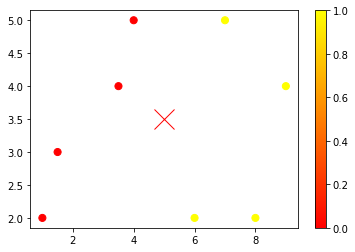

In [24]:
import numpy as np
X = np.array([[1,2], [1.5,3], [3.5,4], [4,5], [6,2], [7,5], [9,4], [8,2]])
y = [0,0,0,0,1,1,1,1]

# linear SVM
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

#그래프로 분류 확인
import mglearn
import matplotlib.pyplot as plt 
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='spring')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([5], [3.5], 'x', color='red', markersize=20) 
plt.colorbar()

print("예측값 :", model.predict([[5, 3.5]]))
print("support vector 좌표값",model.support_vectors_)
print("support 인덱스", model.support_)



In [ ]:
#svm 그래프 그리기
def plot_svc(model, ax=None):
    if ax == None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    #그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) #정방행렬 만들기
    xy = np.vstack([X.ravel(), y.ravel()]).T #1차원으로 만든 뒤 전치시킴
    P = model.decision_function(xy).reshape(X.shape) #판별함수에 입력
    ax.contour(X, Y, P, lavels=[-1, 0, 1], colors='k', linestyles=['--','-','--']) #등고선, 2차원 넘파이배열
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200)

    ax.set_xlim(xlim)
    ax.set_ylabel(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc(model)

### [실습] 올리베티 얼굴 데이터셋
- 40명의 흑백 얼굴 사진 400장, 4096(64 x 64)개 특성
- 0.0 ~ 1.0 (0~255를 스케일링함)

In [27]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
#40명 400장 흑백이미지
print(len(faces.data))
print(len(set(faces.target)))

400
40


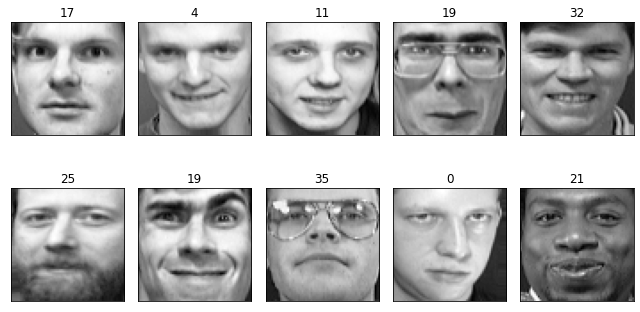

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9,5))
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.gray)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, stratify=faces.target, test_size=0.2, random_state=0)

from sklearn.svm import SVC 
svc = SVC().fit(X_train, y_train)

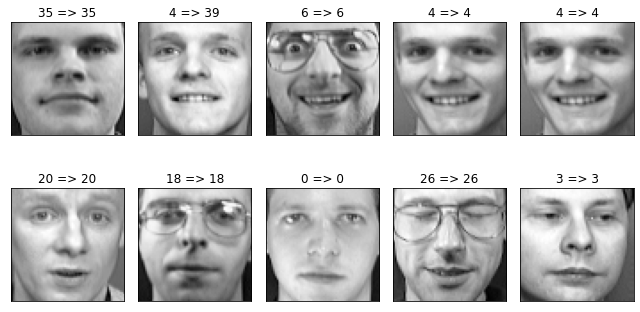

In [32]:
N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9,5))
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.gray)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        pred = svc.predict(X_test[k:(k+1), :])[0]
        plt.title(f"{y_test[k]} => {pred}")
plt.tight_layout()
plt.show()

In [33]:
print("학습용: ", svc.score(X_train, y_train))
print("검증용: ", svc.score(X_test, y_test))

학습용:  1.0
검증용:  0.95


In [34]:
from sklearn.metrics import classification_report, accuracy_score
pred = svc.predict(X_test)
print(classification_report(y_test, pred))
# class 4, 7은 정확도(f1-score)이 낮음

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

/Users/rileyko/opt/anaconda3/envs/riley/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rileyko/opt/anaconda3/envs/riley/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rileyko/opt/anaconda3/envs/riley/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

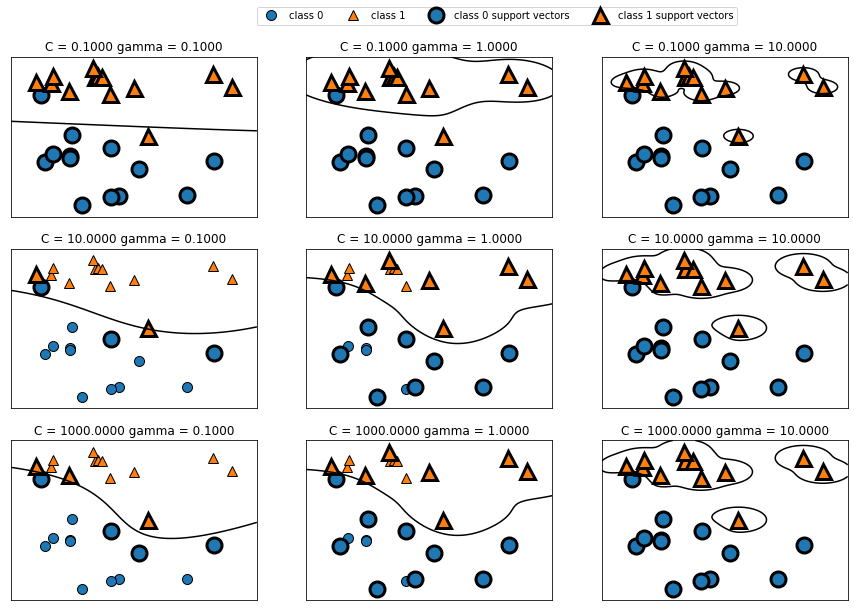

In [36]:
#Cost, Gamma
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

#cost = 0.1, 10, 1000
#Gamma = 0.1, 1, 10
for ax, C in zip(axes, [-1, 1, 3]):
    for a, gamma in zip(ax, [-1, 0, 1]):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax= a)
axes[0, 0].legend(["class 0", "class 1", "class 0 support vectors", "class 1 support vectors"], ncol=4, loc=(1, 1.2))


### [실습] 서포트 벡터와 Cost, Gamma
- Cost
    * 정규화 매개변수로서 오차에 대한 패널티
    * C ⬆️ : 패널티가 줄어짐과 동시에 모델이 더 복잡해짐 --> 더 자세하게 결정경계를 찾아내는 방식
    * C ⬇️ : 이상치들이 있을 가능성을 크게 잡아 일반적인 결정 경계를 만들어냄
- Gamma
    * 데이터 포인트가 영향력을 행사하는 거리 조절
    * Gamma ⬆️ : 데이터 포인트가 영향력을 행사하는 거리가 길어지기 때문에 과대적합 위험
    * Gamma ⬇️ : 데이터 포인트가 영향력을 행사하는 길이가 너무 짧아져서 과소적합 위험

### [실습] 신용카드 사기거래 분류
- 2013년 9월 유럽 카드 소지자가 신용카드로 거래한 내용
- Amount : 거래 금액, Class 0/1 : 정상거래/사기거래

In [40]:
import pandas as pd
df = pd.read_csv('datasets/creditcard.csv')
# df.head()
print(df.columns)
print(df.shape)
print(df.describe())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(100000, 31)
                Time             V1             V2             V3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    42433.231550      -0.262177      -0.032307       0.676217   
std     17044.922359       1.859226       1.656981       1.322926   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     33471.750000      -1.028141      -0.598697       0.176770   
50%     44299.000000      -0.260557       0.078316       0.753976   
75%     55851.250000       1.153324       0.735790       1.376320   
max     67375.000000       1.960497      18.902453       4.226108   

                  V4             V5             V6             V7  \
count  100000.000000  100000.00

In [43]:
print(df.groupby("Class").mean())
print(df["Class"].value_counts())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      42446.091725 -0.249296 -0.041581  0.695399  0.151978 -0.269347   
1      36679.197309 -6.025538  4.117342 -7.906295  4.906056 -4.380838   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.098268 -0.094923  0.050076 -0.040116  ...  0.043923 -0.032534   
1     -1.786228 -6.277658  2.715160 -2.890311  ...  0.350500  0.715742   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.109059 -0.036526  0.009226  0.132042  0.026479 -0.000542  0.001653   
1     -0.123071 -0.260011 -0.105969  0.205242  0.106851  0.522539  0.038871   

           Amount  
Class              
0       97.920523  
1      116.170852  

[2 rows x 30

/Users/rileyko/opt/anaconda3/envs/riley/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '분류\n (0: 정상거래, 1: 사기거래)')

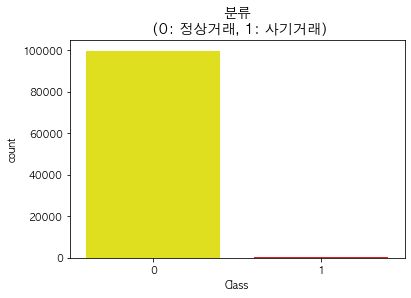

In [46]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

#한글처리 설정하기
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
colors = ["yellow","red"]
sns.countplot('Class', data=df, palette=colors)
plt.title("분류\n (0: 정상거래, 1: 사기거래)", fontsize=14)

In [48]:
print("사기거래")
print(df.Amount[df.Class == 1].describe())
print("정상거래")
print(df.Amount[df.Class == 0].describe())

사기거래
count     223.000000
mean      116.170852
std       256.033191
min         0.000000
25%         1.000000
50%         8.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64
정상거래
count    99777.000000
mean        97.920523
std        264.641755
min          0.000000
25%          7.580000
50%         26.360000
75%         89.000000
max      19656.530000
Name: Amount, dtype: float64


In [ ]:
# 독립 & 종속 변수 설정
# (89p)